# Acquisition of elevation data

In [4]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji.shape)
print(fuji[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# [Problem 1] Data visualization

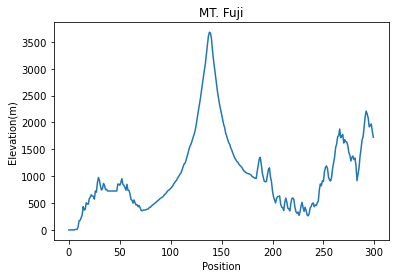

In [5]:
import matplotlib.pyplot as plt

plt.xlabel("Position")
plt.ylabel("Elevation(m)")
plt.title("MT. Fuji")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

# [Problem 2] Create a function to calculate the gradient at a certain point

In [6]:
def calc_slope(point):
    chnge_elevatn = fuji[:, 0][point] - fuji[:, 0][point -1]
    chnge_positn = fuji[:, 3][point] - fuji[:, 3][point -1]
    slope = chnge_positn / chnge_elevatn
    
    return slope
print(calc_slope(0))

5.77190635451505


# [Problem 3] Create a function to calculate the destination point

In [7]:
def cal_destination(crrnt_pnt, alpha, slope):
    destination_pnt = crrnt_pnt - alpha * slope
    
    if(destination_pnt <= 0):
        return 0
    else:
        return round(destination_pnt)
    
#calling slope
alpha = 0.2
crrnt_pnt = 0
slope = calc_slope(crrnt_pnt)
print(cal_destination(crrnt_pnt, alpha, slope))

0


# [Problem 4] Create a function to go down the mountain

In [15]:
def cal_goingdown_mtfuji(crrnt_pnt1, alpha1):
    slope1 = calc_slope(crrnt_pnt1)
    positions = [crrnt_pnt1]
    
    for counter in range(fuji.size):
        crrnt_pnt1 = int(cal_destination(crrnt_pnt1, alpha1, slope1))
        if (positions[-1] == crrnt_pnt1):
            break
        else:
            positions.append(crrnt_pnt1)
    return positions
alpha2 = 0.2

print(cal_goingdown_mtfuji(136, alpha2))

[136, 102, 68, 34, 0]


# [Problem 5] Visualization of the descent process

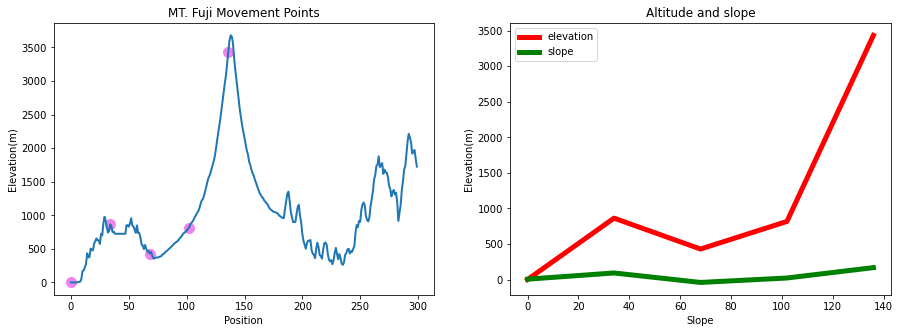

In [22]:
positions_array = cal_goingdown_mtfuji(136, alpha2)

figure = plt.figure(figsize = (15, 5))
fig1 = figure.add_subplot(1, 2, 1)

fig1.set_title("MT. Fuji Movement Points")
fig1.set_xlabel("Position")
fig1.set_ylabel("Elevation(m)")
fig1.plot(fuji[:, 0], fuji[:, 3], lw = 2)
fig1.scatter(positions_array, [fuji[position2, 3] for position2 in positions_array], c = "violet", lw = 5)

fig2 = figure.add_subplot(1, 2, 2)

fig2.set_title("Altitude and slope")
fig2.set_xlabel("Slope")
fig2.set_ylabel("Elevation(m)")
fig2.plot(positions_array, [fuji[position2, 3] for position2 in positions_array], c = 'red', label = 'elevation', lw = 5)
fig2.plot(positions_array, [calc_slope(position2) for position2 in positions_array], c = 'green', label = 'slope', lw = 5)
fig2.legend()
plt.show()


# [Problem 6] Changing initial values

<Figure size 1080x360 with 0 Axes>

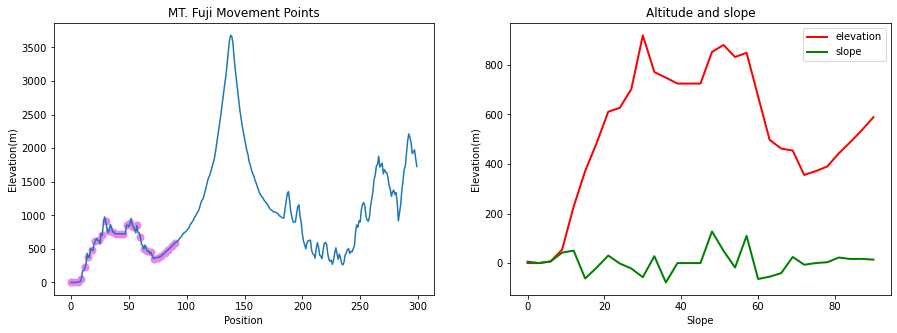

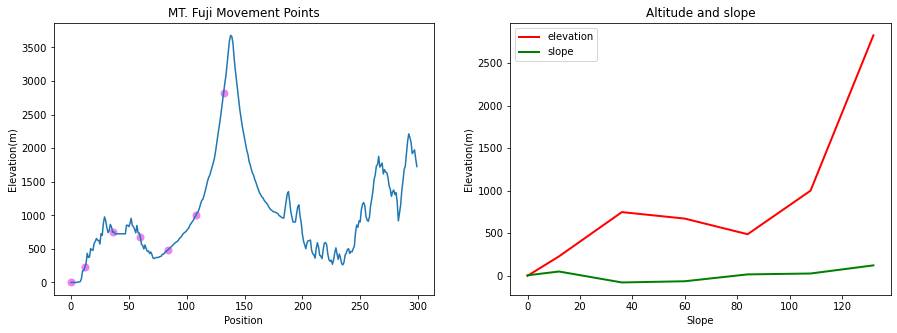

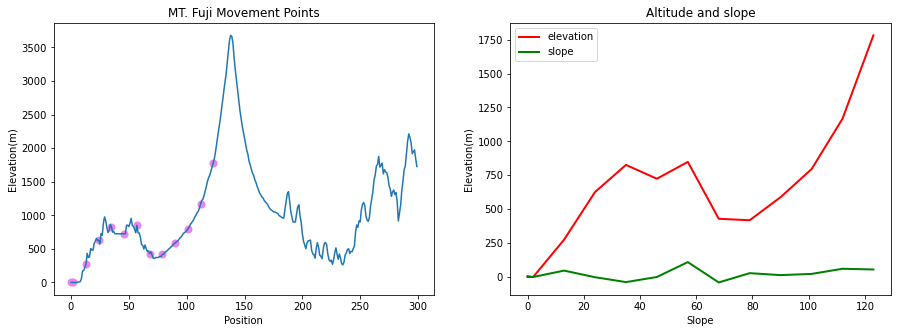

In [24]:
def display_graph_points(points):
    
    figure = plt.figure(figsize = (15, 5))
    alpha3 = 0.2
    
    for point5 in range(points.size):
        
        positions_array1 = cal_goingdown_mtfuji(points[point5], alpha3)
        figure = plt.figure(figsize = (15, 5))
        
        fig1 = figure.add_subplot(1, 2, 1)
        
        fig1.set_title("MT. Fuji Movement Points")
        fig1.set_xlabel("Position")
        fig1.set_ylabel("Elevation(m)")
        fig1.plot(fuji[:, 0], fuji[:, 3])
        fig1.scatter(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = "violet", lw = 2)

        fig2 = figure.add_subplot(1, 2, 2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("Slope")
        fig2.set_ylabel("Elevation(m)")
        fig2.plot(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = 'red', label = 'elevation', lw = 2)
        fig2.plot(positions_array1, [calc_slope(position2) for position2 in positions_array1], c = 'green', label = 'slope', lw = 2)
        fig2.legend()
        plt.show()

points = np.array([90, 132, 123])
display_graph_points(points)

# [Problem 7] Visualization of the descent process for each initial value

<Figure size 1080x360 with 0 Axes>

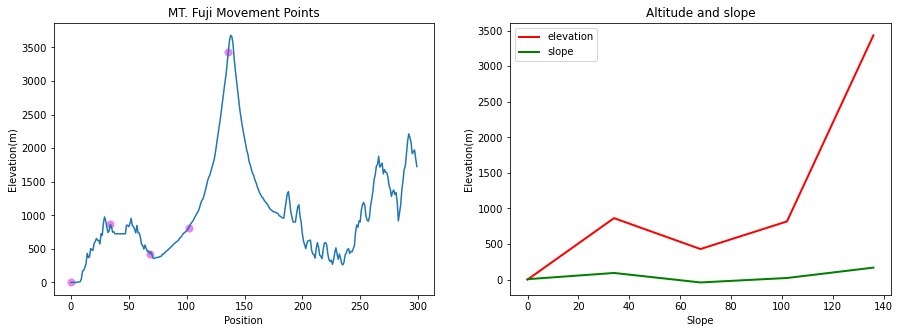

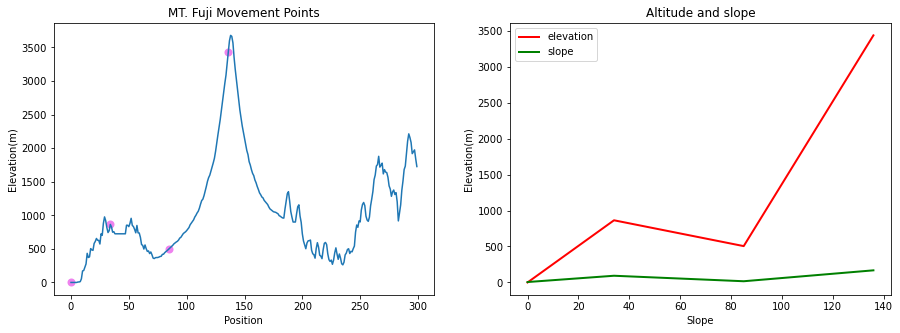

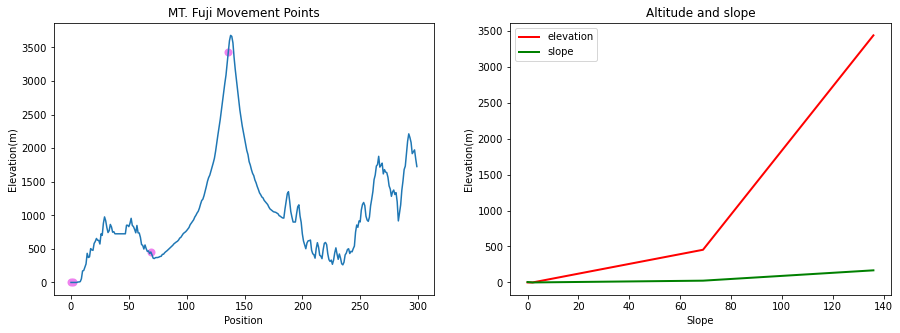

In [25]:
def display_graph_points(alphas):
    
    figure = plt.figure(figsize = (15, 5))
    
    
    for point6 in range(alphas.size):
        
        positions_array1 = cal_goingdown_mtfuji(136, alphas[point6])
        figure = plt.figure(figsize = (15, 5))
        
        fig1 = figure.add_subplot(1, 2, 1)
        
        fig1.set_title("MT. Fuji Movement Points")
        fig1.set_xlabel("Position")
        fig1.set_ylabel("Elevation(m)")
        fig1.plot(fuji[:, 0], fuji[:, 3])
        fig1.scatter(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = "violet", lw = 2)

        fig2 = figure.add_subplot(1, 2, 2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("Slope")
        fig2.set_ylabel("Elevation(m)")
        fig2.plot(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = 'red', label = 'elevation', lw = 2)
        fig2.plot(positions_array1, [calc_slope(position2) for position2 in positions_array1], c = 'green', label = 'slope', lw = 2)
        fig2.legend()
        plt.show()

alphas1 = np.array([0.2, 0.3, 0.4])
display_graph_points(alphas1)

# [Question 8] (Advanced question) Change hyperparameters

<Figure size 1080x360 with 0 Axes>

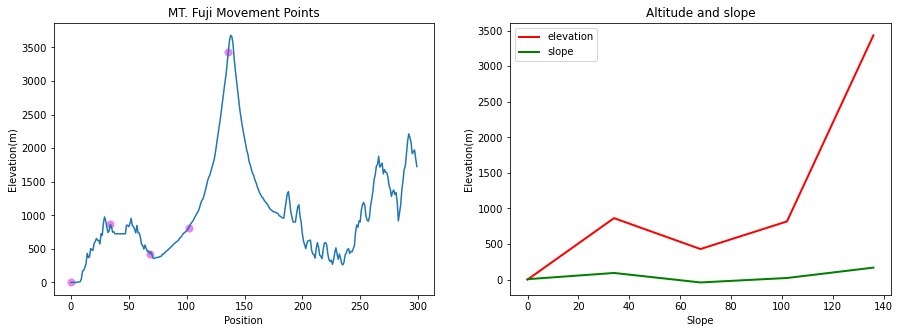

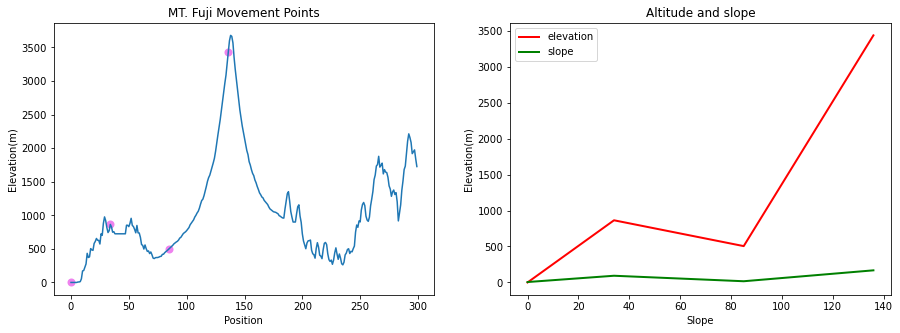

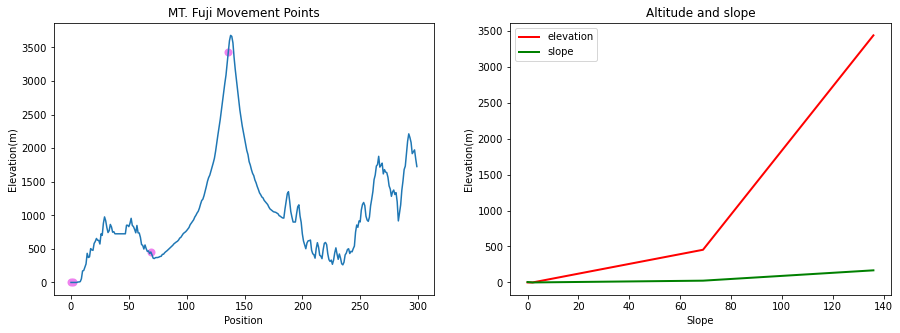

In [31]:
def display_graph_points(alphas):
    
    figure = plt.figure(figsize = (15, 5))
    
    
    for point6 in range(alphas.size):
        
        positions_array1 = cal_goingdown_mtfuji(136, alphas[point6])
        figure = plt.figure(figsize = (15, 5))
        
        fig1 = figure.add_subplot(1, 2, 1)
        
        fig1.set_title("MT. Fuji Movement Points")
        fig1.set_xlabel("Position")
        fig1.set_ylabel("Elevation(m)")
        fig1.plot(fuji[:, 0], fuji[:, 3])
        fig1.scatter(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = "violet", lw = 2)

        fig2 = figure.add_subplot(1, 2, 2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("Slope")
        fig2.set_ylabel("Elevation(m)")
        fig2.plot(positions_array1, [fuji[position2, 3] for position2 in positions_array1], c = 'red', label = 'elevation', lw = 2)
        fig2.plot(positions_array1, [calc_slope(position2) for position2 in positions_array1], c = 'green', label = 'slope', lw = 2)
        fig2.legend()
        plt.show()

alphas1 = np.array([0.2, 0.3, 0.4])
display_graph_points(alphas1)